In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

In [7]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [8]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
iris_data['Species'] = iris.target_names[iris.target]

In [14]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


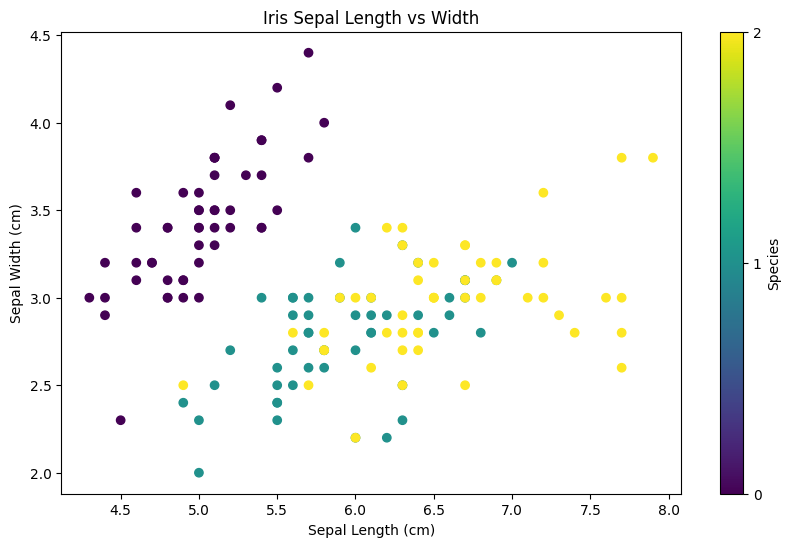

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], c=iris.target, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Sepal Length vs Width')
plt.colorbar(ticks = [0, 1, 2], label = 'Species')
plt.show()

In [25]:
standardscaler = StandardScaler()

In [27]:
df_standardized = iris_data.copy()

In [29]:
df_standardized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
df_standardized[iris.feature_names] = standardscaler.fit_transform(iris_data[iris.feature_names])

In [32]:
df_standardized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


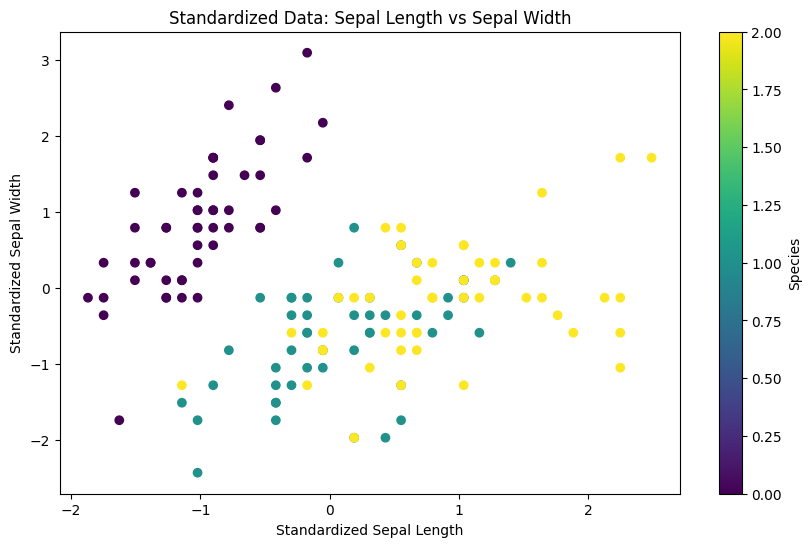

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df_standardized['sepal length (cm)'], df_standardized['sepal width (cm)'], c=iris.target, cmap='viridis')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.title('Standardized Data: Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()

In [ ]:
# Normalization using Min-Max Scaling
# X = (X - X.min()) / (X.max() - X.min())

df_normalized = iris_data.copy()
min_max_scaler = MinMaxScaler()
df_normalized[iris.feature_names] =    min_max_scaler.fit_transform(iris_data[iris.feature_names])

In [41]:
df_normalized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


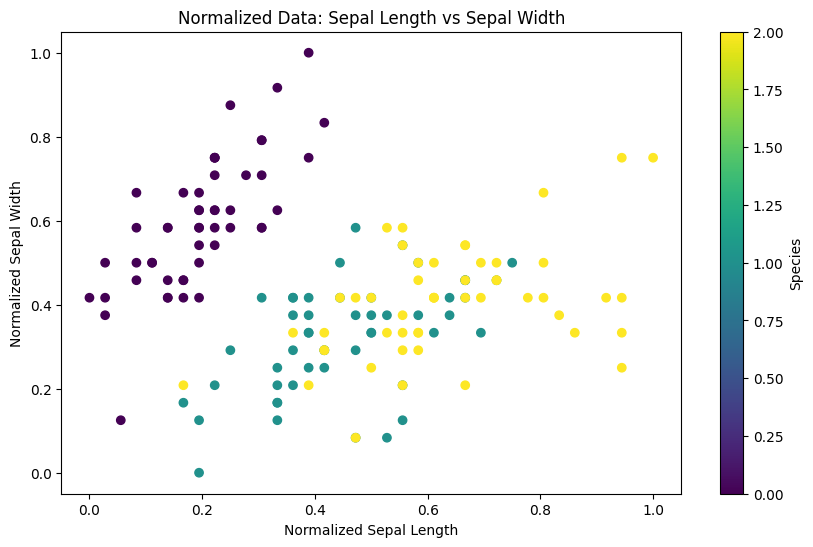

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(df_normalized['sepal length (cm)'], df_normalized['sepal width (cm)'], c = iris.target, cmap = 'viridis')
plt.xlabel('Normalized Sepal Length')
plt.ylabel('Normalized Sepal Width')
plt.title('Normalized Data: Sepal Length vs Sepal Width')
plt.colorbar(label = 'Species')
plt.show()

In [43]:
# Actual mathamatical intuition behind Standardization and Normalization
# Normalization: Rescaling the data to a fixed range, usually 0 to 1.
# Normalization: X' = (X - X.min()) / (X.max() - X.min())

sepal_length_min = iris_data['sepal length (cm)'].min()
sepal_length_max = iris_data['sepal length (cm)'].max()

df_normalized_manual = iris_data['sepal length (cm)'] - sepal_length_min
df_normalized_manual = df_normalized_manual / (sepal_length_max - sepal_length_min)


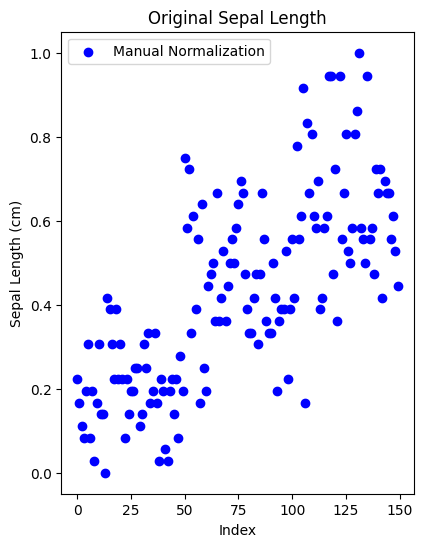

In [56]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(df_normalized_manual)), df_normalized_manual, color='blue', label='Manual Normalization')
plt.title('Original Sepal Length')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()

In [50]:
# Standardization manual
sepal_length_mean = iris_data['sepal length (cm)'].mean()
sepal_length_std = iris_data['sepal length (cm)'].std()
df_standardized_manual = (iris_data['sepal length (cm)'] - sepal_length_mean) / sepal_length_std

In [52]:
df_standardized_manual.head()

0   -0.897674
1   -1.139200
2   -1.380727
3   -1.501490
4   -1.018437
Name: sepal length (cm), dtype: float64

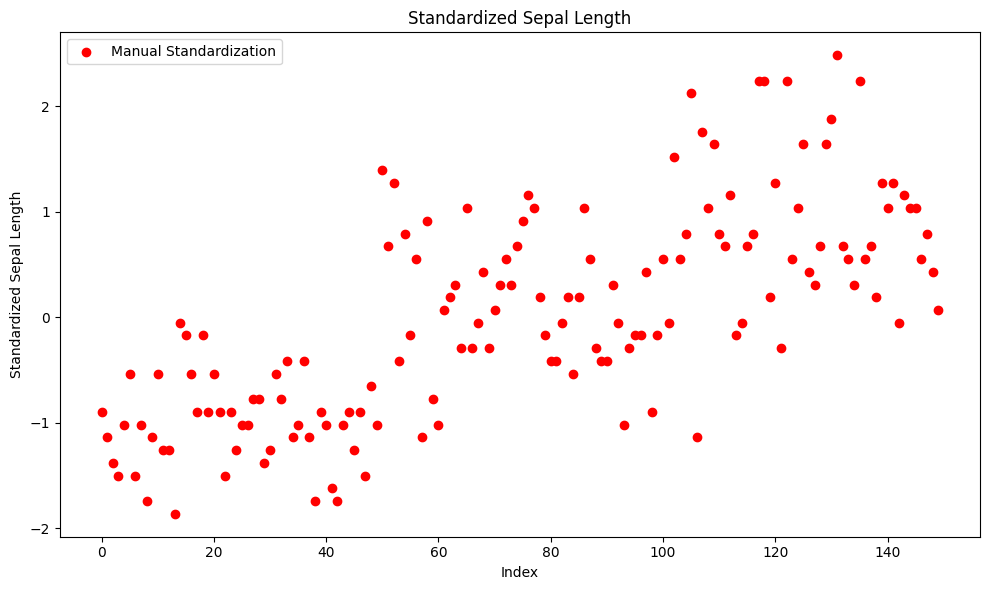

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_standardized_manual)), df_standardized_manual, color='red', label='Manual Standardization')
plt.title('Standardized Sepal Length')
plt.xlabel('Index')
plt.ylabel('Standardized Sepal Length')
plt.legend()
plt.tight_layout()
plt.show()